In [29]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt

import git
import sys, os

path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(path_git)
from functions_cosmo import *
from functions import *

os.chdir(os.path.join(path_git, 'source','PPS'))
ds_SN_plus = read_data_pantheon_plus('Pantheon+SH0ES.dat',
                        'covmat_pantheon_plus_only.npz')
os.chdir(path_git)

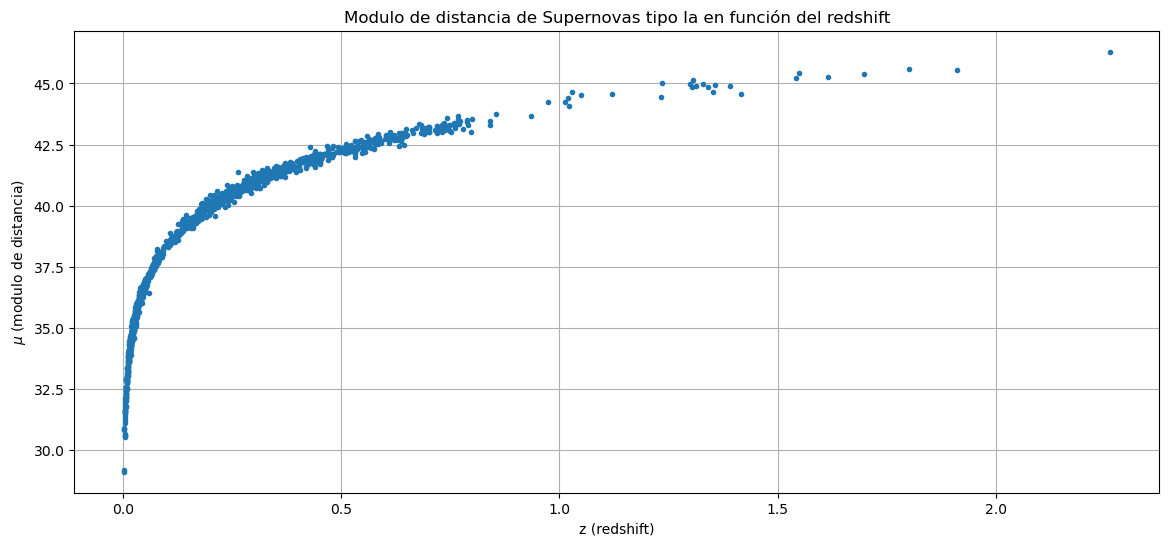

In [30]:
M_abs = -19.37
zhd, zhel, Cinv, mb = ds_SN_plus
muobs =  mb - M_abs


# Graficar la señal temporal
plt.figure(figsize=(14, 6))
plt.plot(zhd,muobs,'.')
plt.xlabel('z (redshift)')
plt.ylabel(r'$\mu$ (modulo de distancia)')
plt.title('Modulo de distancia de Supernovas tipo Ia en función del redshift')
plt.grid(True)
plt.show()

True


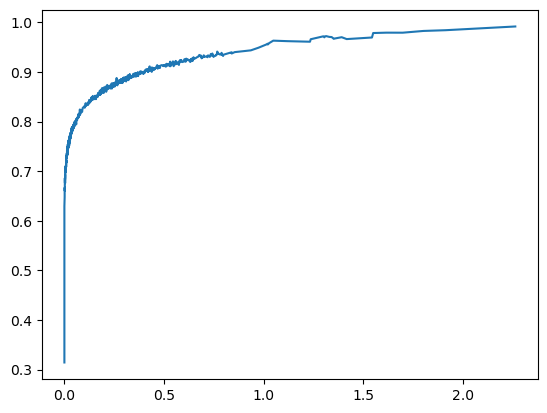

In [56]:
# Generamos la señal temporal
#t = np.array(zhd)[zhd<1]
#raw_seq = np.array(muobs)[zhd<1]

t = np.array(zhd)
raw_seq = np.array(muobs)/np.max(muobs)

len(raw_seq)
print(np.all(t == np.sort(t)))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

raw_seq = smooth(raw_seq, 2)
plt.plot(t,raw_seq)

In [32]:
# Parámetros de la simulación

# choose a number of time steps
look_back = 50

# Cantidad de valores por cada paso temporal
n_features = 1

# Cantidad de pasos que queremos predecir hacia adelante
window_size = 400

# longitud de la cadena izquierda
len_left_chain = 600

# longitud de la cadena derecha
len_right_chain = len(raw_seq) - len_left_chain - window_size

In [33]:
print(len_left_chain, len_right_chain)

600 657


In [34]:
raw_seq_1 = raw_seq[0:len_left_chain]
t_1 = t[0:len_left_chain]

print(len(raw_seq_1),len_left_chain)

600 600


In [35]:
raw_seq_2 = raw_seq[len_left_chain+window_size:len_left_chain+window_size + len_right_chain]
t_2 = t[len_left_chain+window_size:len_left_chain+window_size + len_right_chain]

raw_seq_2_bw = raw_seq_2[::-1]
t_2_bw = t_2[::-1]

print(len(raw_seq_2),len_right_chain)

657 657


In [36]:
t_window = t[len_left_chain:len_left_chain+window_size]
raw_seq_window = raw_seq[len_left_chain:len_left_chain+window_size]
print(len(raw_seq_window),window_size)

400 400


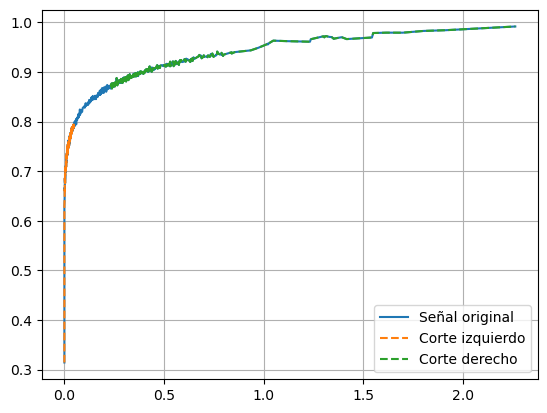

In [37]:
plt.plot(t,raw_seq, label='Señal original')
plt.plot(t_1,raw_seq_1, '--', label='Corte izquierdo')
plt.plot(t_2,raw_seq_2, '--', label='Corte derecho')
plt.grid()
plt.legend()
plt.show()

In [38]:
print('t_1 limits:',t_1[0],t_1[-1])
print('t_window limits:', t_window[0],t_window[-1])
print('t_2 limits:',t_2[0],t_2[-1])
print('t limits:',t[0],t[-1])
print('len of times:', len(t_1),len(t_window),len(t_2),len(t))

t_1 limits: 0.00122 0.04985
t_window limits: 0.04989 0.2352
t_2 limits: 0.23556 2.26137
t limits: 0.00122 2.26137
len of times: 600 400 657 1657


In [39]:
predicciones_adelante_1,valores_reales_1 = make_predictions(raw_seq_1, look_back, n_features, raw_seq_window)

1/1 [==============================] - 0s 31ms/step


In [40]:
# Calculamos el error
diferencia_1 = np.abs(predicciones_adelante_1-raw_seq_window)

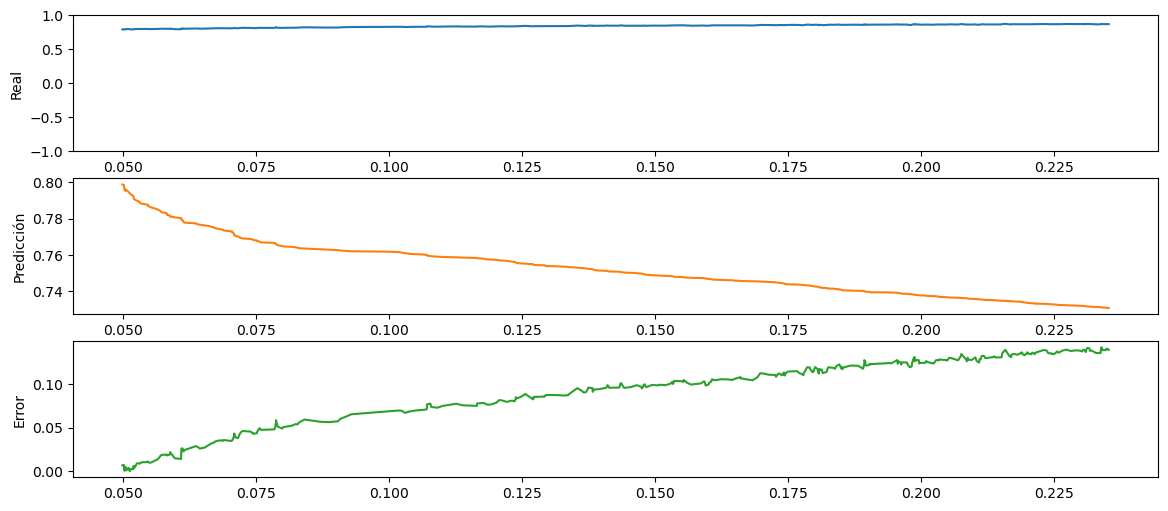

In [41]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(t_window,raw_seq_window)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(t_window,predicciones_adelante_1,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(t_window,diferencia_1,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

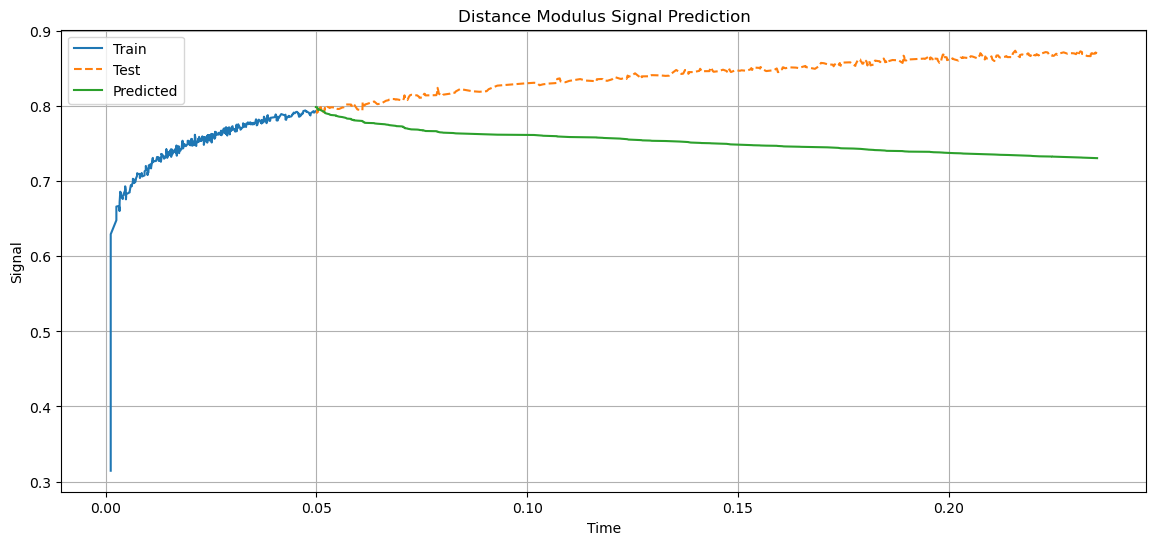

In [42]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,label='Train')
plt.plot(t_window,raw_seq_window,'--',label='Test')
plt.plot(t_window,predicciones_adelante_1,label='Predicted')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Distance Modulus Signal Prediction')
plt.legend()
plt.savefig('figures/cosmo_signal_prediction_1.png')
plt.show()

In [43]:
# split into samples
predicciones_adelante_2_bw,valores_reales_2_bw = make_predictions(raw_seq_2_bw, look_back, n_features, raw_seq_window[::-1])

1/1 [==============================] - 0s 33ms/step


In [44]:
predicciones_adelante_2 = predicciones_adelante_2_bw[::-1]
valores_reales_2 = valores_reales_2_bw[::-1]

# Calculamos el error
diferencia_2 = np.abs(predicciones_adelante_2-raw_seq_window)

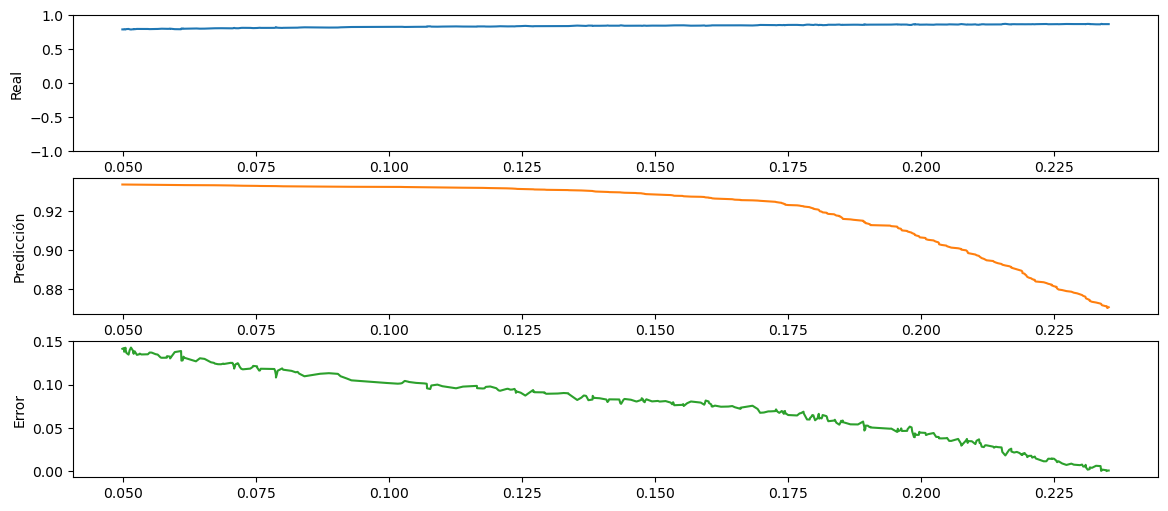

In [45]:
fig = plt.figure(figsize = (14,6))
plt.subplot(3,1,1)
plt.plot(t_window,raw_seq_window)
plt.ylabel('Real')
plt.ylim(-1,1)
plt.subplot(3,1,2)
plt.plot(t_window,predicciones_adelante_2,c='C1')
plt.ylabel('Predicción')
#plt.ylim(-1,1)
plt.subplot(3,1,3)
plt.plot(t_window,diferencia_2,c='C2')
plt.ylabel('Error')
#plt.ylim(0,5)
plt.show()

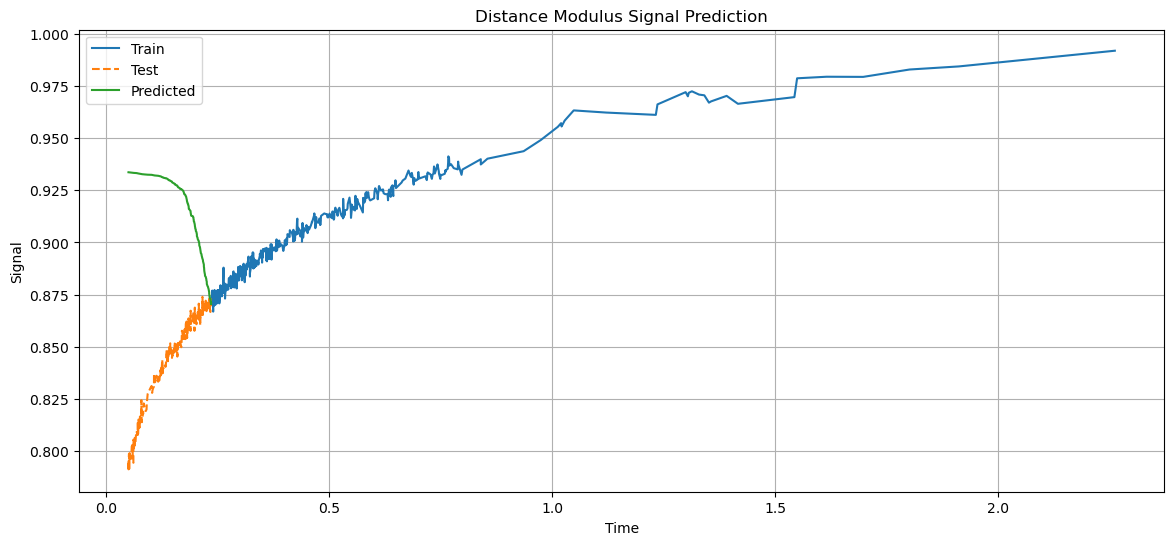

In [46]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_2,raw_seq_2,label='Train')
plt.plot(t_window,raw_seq_window,'--',label='Test')
plt.plot(t_window,predicciones_adelante_2,label='Predicted')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Distance Modulus Signal Prediction')
plt.legend()
plt.savefig('figures/cosmo_signal_prediction_2.png')
plt.show()

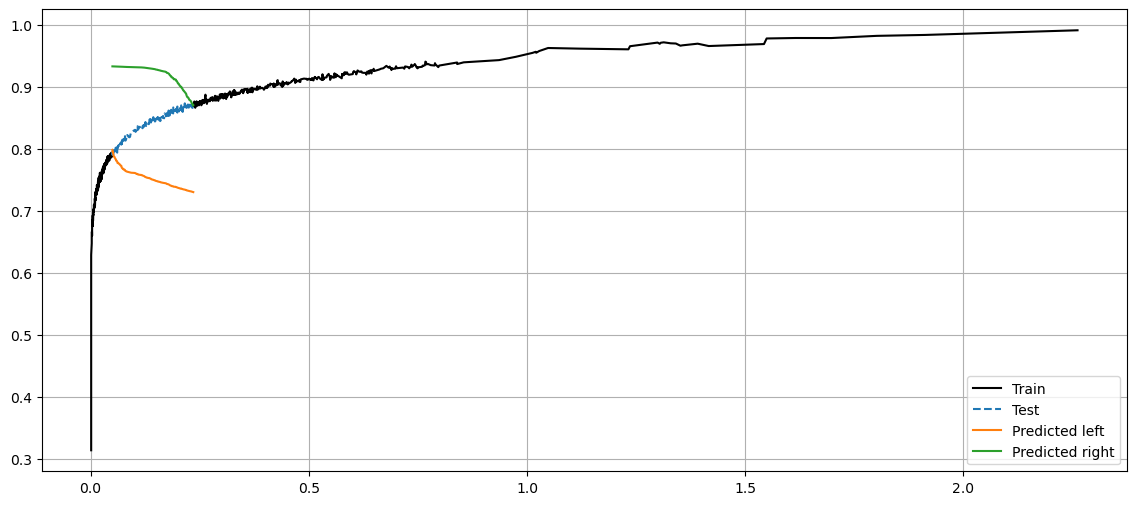

In [47]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,'k',label='Train')
plt.plot(t_window,valores_reales_1,'--',label='Test')
plt.plot(t_window,predicciones_adelante_1,label='Predicted left')
plt.plot(t_2,raw_seq_2,'k')
plt.plot(t_window,predicciones_adelante_2,label='Predicted right')
plt.grid()
plt.legend()


In [48]:
prediction_mean = (predicciones_adelante_1 + predicciones_adelante_2)/2


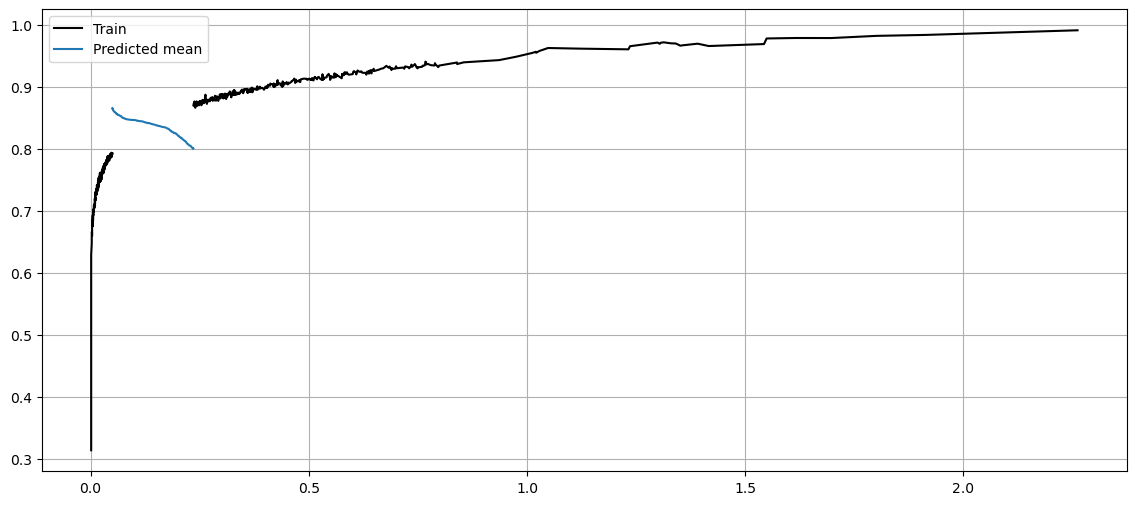

In [49]:
fig = plt.figure(figsize = (14,6))
plt.plot(t_1,raw_seq_1,'k',label='Train')
plt.plot(t_window,prediction_mean,label='Predicted mean')
plt.plot(t_2,raw_seq_2,'k')
plt.grid()
plt.legend()
